In [26]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

df = pd.read_csv("tabelazlotami-airportia.csv")
listamiast = df['skad'].unique()
listamiastdokad = df['dokad'].unique()
#zapisac wyniki more jako slownik, albo jako dwie listy dac -> najpierw miasta potem kraje i inner join
slownikwyniki = {}

for miasto in listamiast:
    try:
        r = requests.get(f"https://www.google.com/search?q=gdzie+jest+{miasto}&client=safari&rls=en&sxsrf=ALiCzsZdcLdDGrXSP_Uf1t6dCaP_1boUZA%3A1652440930344&ei=Yj9-YqDaFOfirgTQ6L7oCA&ved=0ahUKEwigk6mVrtz3AhVnsYsKHVC0D40Q4dUDCA0&uact=5&oq=gdzie+jest+Heraklion&gs_lcp=Cgdnd3Mtd2l6EAMyCAghEBYQHRAeOgcIABBHELADSgUIPBIBMkoECEEYAEoECEYYAFCJBViJBWCACGgCcAF4AIAB9QGIAfUBkgEDMi0xmAEAoAECoAEByAEIwAEB&sclient=gws-wiz", headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15", "Referer": "https://google.com"})
        zupa=bs(r.content, "html.parser")
        napis = zupa.find("span", {"class": "desktop-title-subcontent"})
        if "," in napis.text:
            ciag=napis.text.split(", ")
            slownikwyniki[miasto]=ciag[-1]
        else:
            slownikwyniki[miasto]=napis.text
    except:
        slownikwyniki[miasto]="-"

slownikwyniki2={}

for key, value in slownikwyniki.items():
    if slownikwyniki[key]=="-":
        try:
            r = requests.get(f"https://www.google.com/search?client=safari&rls=en&q={key}+country&ie=UTF-8&oe=UTF-8", headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15", "Referer": "https://google.com"})
            zupa=bs(r.content, "html.parser")
            napis = zupa.find("span", {"class": "wHYlTd z8gr9e"})
            slownikwyniki2[key]=napis.text
        except:
            slownikwyniki2[key]="-"
    else:
        slownikwyniki2[key]=slownikwyniki[key]
print(slownikwyniki2)


{'Antalya': 'Turcja', 'Tbilisi': 'Gruzja', 'Yerevan': 'Armenia', 'Kraków': 'Poland', 'Vienna': 'Austria', 'Tel aviv': 'Izrael', 'Istanbul': 'Turcja', 'Amsterdam': 'Holandia', 'Vilnius': 'Litwa', 'Athens': 'Grecja', 'Wrocław': 'Poland', 'Newark': 'Stany Zjednoczone', 'Budapest': 'Węgry', 'Prague': 'Czechy', 'Copenhagen': 'Dania', 'Munich': 'Niemcy', 'Lisbon': 'Portugalia', 'Miami': 'Stany Zjednoczone', 'Mumbai': 'Indie', 'Frankfurt-am-main': 'Niemcy', 'Stockholm': 'Szwecja', 'Düsseldorf': 'Niemcy', 'Zurich': 'Szwajcaria', 'New york': 'Stany Zjednoczone', 'Geneva': 'Szwajcaria', 'Toronto': 'Kanada', 'Milan': 'Italy', 'Oslo': 'Norwegia', 'Katowice': 'Poland', 'Rzeszów': 'Poland', 'Paris': 'Francja', 'Colombo': 'Sri Lanka', 'Gdańsk': 'Poland', 'Chicago': 'Stany Zjednoczone', 'London': 'Wielka Brytania', 'Riga': 'Łotwa', 'Heraklion': 'Grecja', 'Tokyo': 'Japonia', 'Cluj-napoca': 'Rumunia', 'Ljubljana': 'Słowenia', 'Tallinn': 'Estonia', 'Podgorica': 'Czarnogóra', 'Bucharest': 'Rumunia', 'Chis

In [27]:
#to samo tylko dokąd
for miasto in listamiastdokad:
    try:
        r = requests.get(f"https://www.google.com/search?q=gdzie+jest+{miasto}&client=safari&rls=en&sxsrf=ALiCzsZdcLdDGrXSP_Uf1t6dCaP_1boUZA%3A1652440930344&ei=Yj9-YqDaFOfirgTQ6L7oCA&ved=0ahUKEwigk6mVrtz3AhVnsYsKHVC0D40Q4dUDCA0&uact=5&oq=gdzie+jest+Heraklion&gs_lcp=Cgdnd3Mtd2l6EAMyCAghEBYQHRAeOgcIABBHELADSgUIPBIBMkoECEEYAEoECEYYAFCJBViJBWCACGgCcAF4AIAB9QGIAfUBkgEDMi0xmAEAoAECoAEByAEIwAEB&sclient=gws-wiz", headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15", "Referer": "https://google.com"})
        zupa=bs(r.content, "html.parser")
        napis = zupa.find("span", {"class": "desktop-title-subcontent"})
        if "," in napis.text:
            ciag=napis.text.split(", ")
            slownikwyniki[miasto]=ciag[-1]
        else:
            slownikwyniki[miasto]=napis.text
    except:
        slownikwyniki[miasto]="-"

slownikwyniki3={}

for key, value in slownikwyniki.items():
    if slownikwyniki[key]=="-":
        try:
            r = requests.get(f"https://www.google.com/search?client=safari&rls=en&q={key}+country&ie=UTF-8&oe=UTF-8", headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15", "Referer": "https://google.com"})
            zupa=bs(r.content, "html.parser")
            napis = zupa.find("span", {"class": "wHYlTd z8gr9e"})
            slownikwyniki3[key]=napis.text
        except:
            slownikwyniki3[key]="-"
    else:
        slownikwyniki3[key]=slownikwyniki[key]
print(slownikwyniki3)

{'Antalya': 'Turcja', 'Tbilisi': 'Gruzja', 'Yerevan': 'Armenia', 'Kraków': 'Poland', 'Vienna': 'Austria', 'Tel aviv': 'Izrael', 'Istanbul': 'Turcja', 'Amsterdam': 'Holandia', 'Vilnius': 'Litwa', 'Athens': 'Grecja', 'Wrocław': 'Poland', 'Newark': 'Stany Zjednoczone', 'Budapest': 'Węgry', 'Prague': 'Czechy', 'Copenhagen': 'Dania', 'Munich': 'Niemcy', 'Lisbon': 'Portugalia', 'Miami': 'Stany Zjednoczone', 'Mumbai': 'Indie', 'Frankfurt-am-main': 'Niemcy', 'Stockholm': 'Szwecja', 'Düsseldorf': 'Niemcy', 'Zurich': 'Szwajcaria', 'New york': 'Stany Zjednoczone', 'Geneva': 'Szwajcaria', 'Toronto': 'Kanada', 'Milan': 'Italy', 'Oslo': 'Norwegia', 'Katowice': 'Poland', 'Rzeszów': 'Poland', 'Paris': 'Francja', 'Colombo': 'Sri Lanka', 'Gdańsk': 'Poland', 'Chicago': 'Stany Zjednoczone', 'London': 'Wielka Brytania', 'Riga': 'Łotwa', 'Heraklion': 'Grecja', 'Tokyo': 'Japonia', 'Cluj-napoca': 'Rumunia', 'Ljubljana': 'Słowenia', 'Tallinn': 'Estonia', 'Podgorica': 'Czarnogóra', 'Bucharest': 'Rumunia', 'Chis

In [28]:
df

,numer_lotu,skad,dokad,lot_miasta
0,lo6250,Antalya,Warsaw,Antalya-Warsaw
1,lo724,Tbilisi,Warsaw,Tbilisi-Warsaw
2,lo728,Yerevan,Warsaw,Yerevan-Warsaw
3,lo3910,Kraków,Warsaw,Kraków-Warsaw
4,lo5222,Vienna,Warsaw,Vienna-Warsaw
...,...,...,...,...
7548,lo3969,Warsaw,Lublin,Warsaw-Lublin
7549,lo3803,Warsaw,Rzeszów,Warsaw-Rzeszów
7550,lo10,Chicago,Kraków,Chicago-Kraków
7551,lo159,Kraków,Tel aviv,Kraków-Tel aviv


In [29]:
df["skadkraj"]=df["skad"]

In [30]:
df["dokadkraj"]=df["dokad"]

In [31]:
listakrajowskad=df["skadkraj"]
listadotabeliskad=[]
listakrajowdokad=df["dokadkraj"]
listadotabelidokad=[]

In [32]:
for i in listakrajowskad:
    listadotabeliskad.append(slownikwyniki2[i])

for i in listakrajowdokad:
    listadotabelidokad.append(slownikwyniki3[i])


In [33]:
listadotabeliskad

['Turcja',
 'Gruzja',
 'Armenia',
 'Poland',
 'Austria',
 'Izrael',
 'Turcja',
 'Holandia',
 'Litwa',
 'Grecja',
 'Poland',
 'Poland',
 'Stany Zjednoczone',
 'Austria',
 'Węgry',
 'Czechy',
 'Dania',
 'Poland',
 'Niemcy',
 'Portugalia',
 'Stany Zjednoczone',
 'Indie',
 'Niemcy',
 'Szwecja',
 'Niemcy',
 'Szwajcaria',
 'Holandia',
 'Stany Zjednoczone',
 'Szwajcaria',
 'Niemcy',
 'Kanada',
 'Italy',
 'Norwegia',
 'Poland',
 'Poland',
 'Poland',
 'Francja',
 'Poland',
 'Sri Lanka',
 'Poland',
 'Stany Zjednoczone',
 'Niemcy',
 'Wielka Brytania',
 'Szwajcaria',
 'Węgry',
 'Czechy',
 'Łotwa',
 'Grecja',
 'Austria',
 'Japonia',
 'Izrael',
 'Rumunia',
 'Grecja',
 'Litwa',
 'Słowenia',
 'Estonia',
 'Czarnogóra',
 'Rumunia',
 'Mołdawia',
 'Bułgaria',
 'Albania',
 'Serbia',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Słowacja',
 'Poland',
 'Hiszpania',
 'Poland',
 'Niemcy',
 'Poland',
 'Turcja',
 'Austria',
 'Słowenia',
 'Estonia',
 'Turcja',
 'Łotwa',
 'Rumunia',
 'Poland'

In [34]:
listadotabelidokad

['Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',
 'Poland',

In [35]:
df["dokadkraj"]=listadotabelidokad
df["skadkraj"]=listadotabeliskad

In [36]:
df

,numer_lotu,skad,dokad,lot_miasta,skadkraj,dokadkraj
0,lo6250,Antalya,Warsaw,Antalya-Warsaw,Turcja,Poland
1,lo724,Tbilisi,Warsaw,Tbilisi-Warsaw,Gruzja,Poland
2,lo728,Yerevan,Warsaw,Yerevan-Warsaw,Armenia,Poland
3,lo3910,Kraków,Warsaw,Kraków-Warsaw,Poland,Poland
4,lo5222,Vienna,Warsaw,Vienna-Warsaw,Austria,Poland
...,...,...,...,...,...,...
7548,lo3969,Warsaw,Lublin,Warsaw-Lublin,Poland,Poland
7549,lo3803,Warsaw,Rzeszów,Warsaw-Rzeszów,Poland,Poland
7550,lo10,Chicago,Kraków,Chicago-Kraków,Stany Zjednoczone,Poland
7551,lo159,Kraków,Tel aviv,Kraków-Tel aviv,Poland,Izrael


In [37]:
df["skadkraj"].unique()

array(['Turcja', 'Gruzja', 'Armenia', 'Poland', 'Austria', 'Izrael',
       'Holandia', 'Litwa', 'Grecja', 'Stany Zjednoczone', 'Węgry',
       'Czechy', 'Dania', 'Niemcy', 'Portugalia', 'Indie', 'Szwecja',
       'Szwajcaria', 'Kanada', 'Italy', 'Norwegia', 'Francja',
       'Sri Lanka', 'Wielka Brytania', 'Łotwa', 'Japonia', 'Rumunia',
       'Słowenia', 'Estonia', 'Czarnogóra', 'Mołdawia', 'Bułgaria',
       'Albania', 'Serbia', 'Słowacja', 'Hiszpania', 'Chorwacja',
       'Belgia', 'Unitary parliamentary constitutio...',
       'Korea Południowa', 'Cypr', 'Paragwaj', 'Dominikana', 'Meksyk',
       'Włochy', 'Kuwait City; 29°22′N ...\u200e',
       '05-102 Nowy Dwór Mazowiecki', 'Islandia', 'Liban', 'Malay'],
      dtype=object)

In [38]:
df["dokadkraj"].unique()

array(['Poland', 'Francja', 'Holandia', 'Austria', 'Belgia', 'Szwajcaria',
       'Wielka Brytania', 'Niemcy', 'Dania',
       'Unitary parliamentary constitutio...', 'Italy', 'Norwegia',
       'Węgry', 'Czechy', 'Szwecja', 'Hiszpania', 'Stany Zjednoczone',
       'Rumunia', 'Łotwa', 'Bułgaria', 'Estonia', 'Serbia', 'Litwa',
       'Korea Południowa', 'Słowacja', 'Turcja', 'Czarnogóra', 'Albania',
       'Mołdawia', 'Słowenia', 'Izrael', 'Chorwacja', 'Sri Lanka',
       'Kanada', 'Indie', 'Armenia', 'Gruzja', 'Cypr', 'Meksyk',
       'Dominikana', 'Grecja', 'Japonia', 'Liban', 'Islandia', 'Włochy',
       'Chiny'], dtype=object)

In [39]:
df["typ_lotu"]=df[['skadkraj', 'dokadkraj']].agg('-'.join, axis=1)

In [40]:
listataknie=[]
for i in df["typ_lotu"]:
    if i=="Poland-Poland":
        listataknie.append("krajowe")
    elif i=="Poland-05-102 Nowy Dwór Mazowiecki":
        listataknie.append("krajowe")
    elif i=="05-102 Nowy Dwór Mazowiecki-Poland":
        listataknie.append("krajowe")
    else:
        listataknie.append("międzynarodowe")

In [41]:
df["typ_lotu"]=listataknie

In [42]:
df

,numer_lotu,skad,dokad,lot_miasta,skadkraj,dokadkraj,typ_lotu
0,lo6250,Antalya,Warsaw,Antalya-Warsaw,Turcja,Poland,międzynarodowe
1,lo724,Tbilisi,Warsaw,Tbilisi-Warsaw,Gruzja,Poland,międzynarodowe
2,lo728,Yerevan,Warsaw,Yerevan-Warsaw,Armenia,Poland,międzynarodowe
3,lo3910,Kraków,Warsaw,Kraków-Warsaw,Poland,Poland,krajowe
4,lo5222,Vienna,Warsaw,Vienna-Warsaw,Austria,Poland,międzynarodowe
...,...,...,...,...,...,...,...
7548,lo3969,Warsaw,Lublin,Warsaw-Lublin,Poland,Poland,krajowe
7549,lo3803,Warsaw,Rzeszów,Warsaw-Rzeszów,Poland,Poland,krajowe
7550,lo10,Chicago,Kraków,Chicago-Kraków,Stany Zjednoczone,Poland,międzynarodowe
7551,lo159,Kraków,Tel aviv,Kraków-Tel aviv,Poland,Izrael,międzynarodowe


In [43]:
wykres = df.groupby("typ_lotu").count()

In [45]:
wykres["skad"]

typ_lotu
krajowe           2053
międzynarodowe    5500
Name: skad, dtype: int64

In [46]:
#ile procent stanowią loty miedzynarodowe w danych dot. popularności
(wykres["skad"][1]/(wykres["skad"][0]+wykres["skad"][1]))*100

72.8187475175427

In [47]:
#ile procent stanowią loty krajowe w danych dot. popularności
(wykres["skad"][0]/(wykres["skad"][0]+wykres["skad"][1]))*100

27.181252482457303

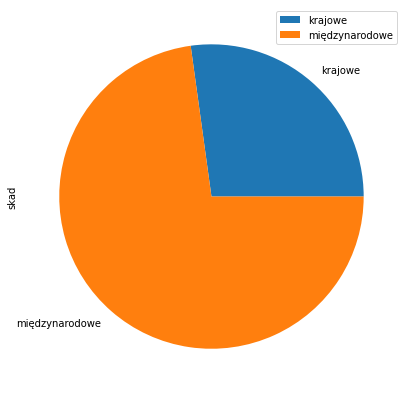

In [48]:
#wykres który pokazuje odsetek krajowych i międzynarodowych lotów w danych dot. popularności
plot = wykres.plot.pie(y='skad', figsize=(7, 7))